<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML4_ponto_de_partida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Acuracidade, Precisão e Revocação: Algumas Medidas de Eficiência de Classificação**
--- 




# Acuracidade

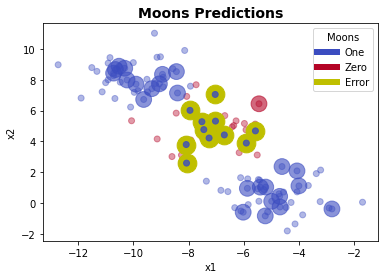

# Matriz de Confusão e Classification Report




In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[24  0]
 [11  1]]

Score de Acuracidade (1):

0.69

Score de Acuracidade (2):

0.69

Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36



## Matriz de Confusão




In [ ]:
results = pd.concat([ X_test,y_test], axis=1)
results['y_pred'] = y_pred
results['Igual?'] =  y_pred == y_test
results

,x1,x2,y,y_pred,Igual?
34,-5.445509,6.437457,1,1,True
43,-4.610938,2.364080,0,0,True
23,-8.071103,2.587660,1,0,False
35,-5.866169,0.949079,0,0,True
44,-5.904228,3.887125,1,0,False
101,-4.067622,2.082736,0,0,True
11,-6.701767,4.416635,1,0,False
50,-9.328387,7.418267,0,0,True
10,-5.200051,1.031011,0,0,True
100,-10.715177,8.424962,0,0,True



> **Na Matriz de Confusão as linhas representam os dados de teste e as colunas os valores previstos. Vale a pena você se deter um pouco sobre isso e de fato entender os valores em cada linha e coluna da Matriz de Confusão.**

> **Cuidado: A ordem dos dados de teste e predições, em linhas ou colunas, pode ser qualquer em uma Matriz de Confusão. Por que escolhemos  as linhas para representar os dados de teste e as colunas os valores previstos? Por que as funções do scikit-learn em geral têm esse padrão e adotaremos essa ordem nas análises e interpretações.**


![imagem](https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/matriz_de_confusao.png) 

<small><b>Fig 1. Matriz de Confusão.

Dessa matriz saem todos os valores e métricas úteis para a análise dos resultados. Particularmente, interessam os valores: 

* **Verdadeiro positivo (TP)**, em que valor previsto corresponde ao valor real, isto é o valor real era positivo e o modelo previu um valor positivo

* **Verdadeiro negativo (TN)**, em que o valor real era negativo e o modelo previu um valor negativo também corretamente

* **Falso Positivo (FP)**, Ou **Erro Tipo 1**, em que o valor real era negativo, mas o modelo previu um valor positivo. É o caso em que o modelo é **superestimado**, gerando falsos alarmes.

* **Falso negativo (FN)**, Ou **Erro tipo 2**, em que o valor real era positivo, mas o modelo previu um valor negativo. É o caso em que o modelo é **substimado**, gerando perda de casos positivos.



## Acuracidade

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$

$$ Accuracy = \frac{Total de Acertos}{Total de Casos} $$

## Precisão e *Recall*

$$ Precision = \frac{TP}{TP + FP} $$

e

$$ Recall = \frac{TP}{TP + FN} $$


A Precisão é um valor que, dados todos elementos previstos uma classe, quantos foram previstos corretamente. Isto é, o percentual dos casos que de fato pertencem àquela classe.

O *Recall* (Revocação, ou Sensibilidade) por outro lado nos diz quantos casos de uma determinada classe foram corretamente previstos. E você pode pensar que precisamos fazer uma nova busca (*recall*) para os elementos da classe que ainda não foram identificados! 



$$ F1-score = \frac{2}{1/Recall + 1/Precision}$$

Na prática, quando tentamos aumentar a precisão do nosso modelo, o recall diminui e vice-versa. A pontuação F1 permite capturar ambas as tendências em um único valor.




In [ ]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36

